In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing required libaries

In [ ]:
import pandas as pd 
import numpy as np
import math

Loading train and test data

In [ ]:
train_df = pd.read_csv("/content/drive/Shareddrives/kdd dataset/binaryTraget_df.csv")
test_df=pd.read_csv("/content/drive/Shareddrives/kdd dataset/processed_test_df.csv")

In [ ]:
df=train_df.loc[:,train_df.columns!='target']

For marking data point to corresponding cluster

In [ ]:
clusters=[0]*df.shape[0]

Choosing first two data points as initial clusters

In [ ]:
#initial cluster centroids
centroids=[[0]*df.shape[1]]*5
centroids=df.iloc[0:5,]

In [ ]:
#function to calulate eucliedean distance between data points
def euclideanDistance(point1,point2):
  s=0
  for i in range(len(point1)):
    s+=(point1[i]-point2[i])**2
  return math.sqrt(s)

Iterations for calcluting cluster centers 

In [ ]:
num_iters=25
for i in range(num_iters):
  #print(i)
  dist=[0]*5
  for index, row in df.iterrows():
    #distance calculation from point to cluster centroid
    for i,ele in centroids.iterrows():
      e_dist=euclideanDistance(row,ele)
      dist[i]=e_dist
    
    #grouping
    clusters[index] = dist.index(min(dist))
    
  #update cluster centers
  df['cluster']=pd.Series(clusters)

  new_cluster_centroids=[[0]*df.shape[1]]*5
  #new clusters
  for i in range(5):
    new_cluster_centroids[i]=df[df['cluster']==i].mean(axis=0).drop(['cluster'])
  
  #update centroids
  centroids=new_cluster_centroids
  centroids=pd.DataFrame(centroids)
  
  #removing cluster column
  df.drop('cluster', inplace=True, axis=1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [ ]:
centroids_df=pd.DataFrame(centroids)

Saving centroids

In [ ]:
centroids_df.to_csv("/content/drive/Shareddrives/kdd dataset/centroids_multiclass.csv",index=False)

In [ ]:
pd.DataFrame(clusters).to_csv("/content/drive/Shareddrives/kdd dataset/clusters_multiclass.csv",index=False)

In [ ]:
centroids_df=pd.read_csv("/content/drive/Shareddrives/kdd dataset/centroids_multiclass.csv")

In [ ]:
count=[0]*5
for i in range(5):
  s=0
  for j in range(len(clusters)):
    if clusters[j]==i:
      s+=1
  count[i]=s

In [ ]:
print(count)
print(sum(count))

[12257, 26748, 34973, 2944, 49051]
125973


train target data encoding
DOS-0,R2L-1,U2R-2,normal-3,probe-4


In [ ]:
train_target = pd.read_csv("/content/drive/Shareddrives/kdd dataset/multiClassWithLabel_train_encoded.csv")
print(train_target.value_counts())

target_encoded
3                 67343
0                 45927
4                 11656
1                   995
2                    52
dtype: int64


Loading test target

In [ ]:
test_target = pd.read_csv("/content/drive/Shareddrives/kdd dataset/multiClassWithLabel_test_encoded.csv")
print(test_target.value_counts())

target_encoded
3                 9711
0                 7460
1                 2885
4                 2421
2                   67
dtype: int64


In [ ]:
train_df['target']=train_target
test_df['target']=test_target

number of normal traffic and attacks in each cluster

Encoding
DOS-0,R2L-1,U2R-2,normal-3,probe-4

cluster2-DOS
cluster1-R2L & U2R
cluster4-normal
cluster3-NA
cluster0-probe

In [ ]:
#[DOS,R2L,U2R,normal,probe]
for i in range(5):
  count=[0]*5
  for j in range(len(clusters)):
    if clusters[j]==i:
      if train_df['target'][j]==0:
        count[0]+=1
      elif train_df['target'][j]==1:
        count[1]+=1
      elif train_df['target'][j]==2:
        count[2]+=1
      elif train_df['target'][j]==3:
        count[3]+=1
      else:
        count[4]+=1
  print("for cluster:")
  print(i)
  print(count)
  print("====")

for cluster:
0
[6888, 0, 0, 220, 5149]
====
for cluster:
1
[3739, 521, 20, 16544, 5924]
====
for cluster:
2
[34344, 3, 0, 129, 497]
====
for cluster:
3
[16, 52, 0, 2843, 33]
====
for cluster:
4
[940, 419, 32, 47607, 53]
====


labeling for each cluster centroid 

Encoding DOS-0,R2L-1,U2R-2,normal-3,probe-4


Dos-cluster2
R2L-cluster1
U2R-cluster4
normal-cluster4
probe-cluster0

cluster_centroids = [probe,R2L,DOS,U2R,normal]

Clustering on test data

In [ ]:
test_df.columns

Index(['su_attempted', 'dst_host_same_src_port_rate', 'count', 'logged_in',
       'dst_host_srv_count', 'dst_host_same_srv_rate', 'srv_count',
       'same_srv_rate', 'dst_host_rerror_rate', 'num_compromised',
       ...
       '64', '65', '66', '67', '68', '69', 'target', 'cluster', 'cluster_copy',
       'match'],
      dtype='object', length=108)

In [ ]:
del test_df['cluster']
del test_df['cluster_copy']
del test_df['match']

In [ ]:
test_points=test_df.loc[:,train_df.columns!='target']

In [ ]:
test_points.shape

(22544, 104)

In [ ]:
clusters_test=[0]*df.shape[0]

In [ ]:
centroids_df=pd.DataFrame(centroids)

In [ ]:
for index,row in test_points.iterrows():
   #distance calculation from point to cluster
    for i,ele in centroids_df.iterrows():
      e_dist=euclideanDistance(row,ele)
      dist[i]=e_dist
    
    #grouping
    clusters_test[index] = dist.index(min(dist))

#update cluster centers
test_df['cluster']=pd.Series(clusters_test)


Encoding DOS-0,R2L-1,U2R-2,normal-3,probe-4


Dos-cluster2
R2L-cluster1
U2R-cluster1
normal-cluster4
probe-cluster0

In [ ]:
test_df['cluster'].value_counts()

4    14539
2     4841
1     2500
0      654
3       10
Name: cluster, dtype: int64

In [ ]:
test_df['target'].value_counts()

3    9711
0    7460
1    2885
4    2421
2      67
Name: target, dtype: int64

Evaluation

In [ ]:
test_df['cluster_copy']=pd.Series(clusters_test)

In [ ]:
test_df['cluster_copy'].value_counts()

4    14539
2     4841
1     2500
0      654
3       10
Name: cluster_copy, dtype: int64

In [ ]:
cluster_label=['probe','R2L','DOS','U2R','normal']

In [ ]:
for i in range(5):
  test_df.loc[test_df['cluster_copy']==i,"cluster_copy"]=cluster_label[i]
  

In [ ]:
test_df['cluster_copy'].value_counts()

normal    14539
DOS        4841
R2L        2500
probe       654
U2R          10
Name: cluster_copy, dtype: int64

In [ ]:
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
le.fit(test_df['cluster_copy'])
test_df['cluster_encoded']=le.transform(test_df['cluster_copy'])

In [ ]:
test_df['cluster_encoded'].value_counts()

3    14539
0     4841
1     2500
4      654
2       10
Name: cluster_encoded, dtype: int64

In [ ]:
test_df['match']=test_df['target']==test_df['cluster_encoded']

In [ ]:
print(test_df['match'].mean())

0.5489709013484741


Confusion matrix

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

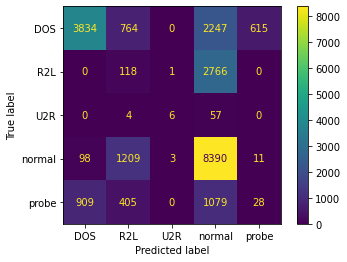

In [ ]:
confusion_matrix = metrics.confusion_matrix(test_df['target'], test_df['cluster_encoded'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['DOS', 'R2L','U2R','normal','probe'])

cm_display.plot()
plt.show()

In [ ]:
print("precision:",metrics.precision_score(test_df['target'],test_df['cluster_encoded'],average=None))

precision: [0.79198513 0.0472     0.6        0.57706857 0.04281346]


In [ ]:
print("recall:",metrics.recall_score(test_df['target'],test_df['cluster_encoded'],average=None))

recall: [0.51394102 0.04090121 0.08955224 0.8639687  0.01156547]


In [ ]:
print("accuray:",metrics.accuracy_score(test_df['target'],test_df['cluster_encoded']))

accuray: 0.5489709013484741
